<a href="https://colab.research.google.com/github/MaaviaAsghar4/US_Accidents_Analysis-EDA-/blob/main/US_Accidents_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Kaggle DataSet

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 98% 283M/290M [00:03<00:00, 89.6MB/s]
100% 290M/290M [00:03<00:00, 94.0MB/s]


In [ ]:
ls

kaggle.json  US_Accidents_Dec20_Updated.csv  us-accidents.zip


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  us-accidents.zip
replace US_Accidents_Dec20_Updated.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
ls

kaggle.json  US_Accidents_Dec20_Updated.csv


# Importing Necessary Libraries and DataSet

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('US_Accidents_Dec20_Updated.csv')
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


# Data Cleaning and Preparation

In [6]:
data.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [7]:
# Removing unnecessary columns
data = data.drop(['End_Time','End_Lat','End_Lng','Distance(mi)','Description','Number','Side','Street','Astronomical_Twilight','Nautical_Twilight','Civil_Twilight','Sunrise_Sunset','Precipitation(in)','Wind_Speed(mph)','Wind_Direction','Visibility(mi)','Pressure(in)','Wind_Chill(F)','Zipcode','Timezone','Airport_Code','Weather_Timestamp','Country','Temperature(F)','Humidity(%)'],axis=1)

## Start Time of Accidents

In [8]:
# Converting start time of accidents to datetime object
pd.to_datetime(data['Start_Time'])
# Adding hour and month column
data['Hour'] = pd.to_datetime(data['Start_Time']).dt.hour
data['Month'] = pd.to_datetime(data['Start_Time']).dt.month

## States in which Accidents Occur

In [9]:
# droping city, county column
data = data.drop(['City', 'County'],axis=1)
data['Count'] = 1

In [10]:
data.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,State,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Hour,Month,Count
0,A-1,2,2019-05-21 08:29:55,34.808868,-82.269157,SC,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,8,5,1
1,A-2,2,2019-10-07 17:43:09,35.090080,-80.745560,NC,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,17,10,1
2,A-3,2,2020-12-13 21:53:00,37.145730,-121.985052,CA,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,21,12,1
3,A-4,2,2018-04-17 16:51:23,39.110390,-119.773781,NV,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,16,4,1
4,A-5,3,2016-08-31 17:40:49,26.102942,-80.265091,FL,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,17,8,1


## Cleaning and preparing weather_condition, temperature, and humidity value

In [11]:
# preparing alternate dataframe for impact of weather_condition on accidents
weather_data = data[data['Weather_Condition'].notna()]

# Data Analysis and Visualization

## Tasks
1. State that has highest number of accidents
2. At what time do accidents usually occur in US
3. Visualize US accidents
4. In which weather conditions accidents occurs the most
5. Factors affecting accidents severity

### Task 1: States that has highest number of accidents

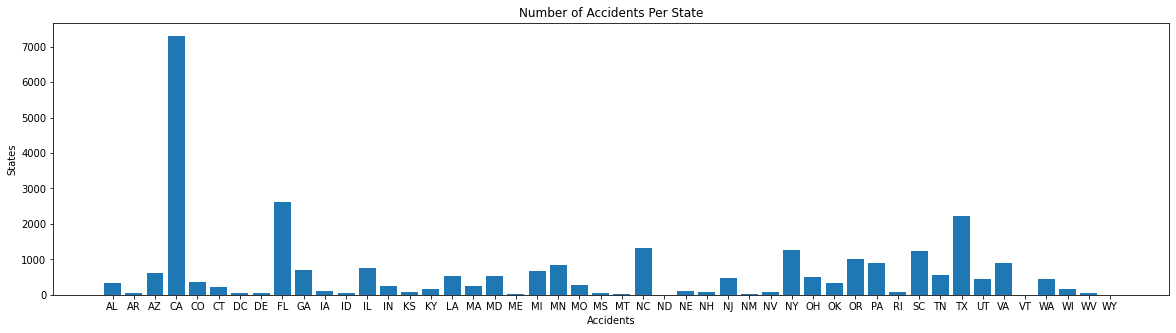

In [62]:
import matplotlib.pyplot as plt
# Taking a 1% random data sample for analysis

# Function to draw plots
def draw_plot(groupby_value,title,xlabel,ylabel,xzise=15,ysize=5,rotation='horizontal'):
  subset_data = data.sample(frac=0.01)
  keys = [pair for pair, df in subset_data.groupby([groupby_value])]
  plt.figure(figsize=(xzise,ysize))
  plt.bar(keys,subset_data.groupby(groupby_value).count()['Count'])
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.xticks(keys,rotation=rotation,size=10)
  plt.show()

draw_plot('State','Number of Accidents Per State','Accidents','States',20)

From the above graph it could be concluded that California (CA) has the highest number of accidents followed by Florida (FL) and Texas (TX)

### Task 2: At what time do accidents usually occur in US

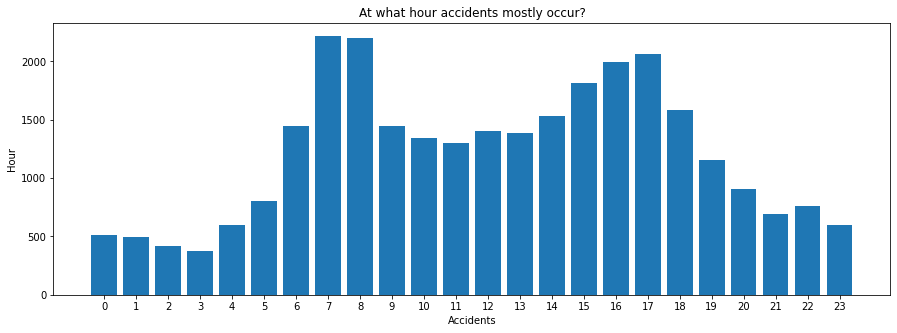

In [63]:
# At what hour accidents mostly occur?
draw_plot('Hour','At what hour accidents mostly occur?','Accidents','Hour')

From the above graph, two things could be concluded;
1. First peak of accidents occur between 6-9 am. This might be due to people rushing to their offices.
2. Second peak occurs between 3-6 pm. This might be due to people coming to their homes from office

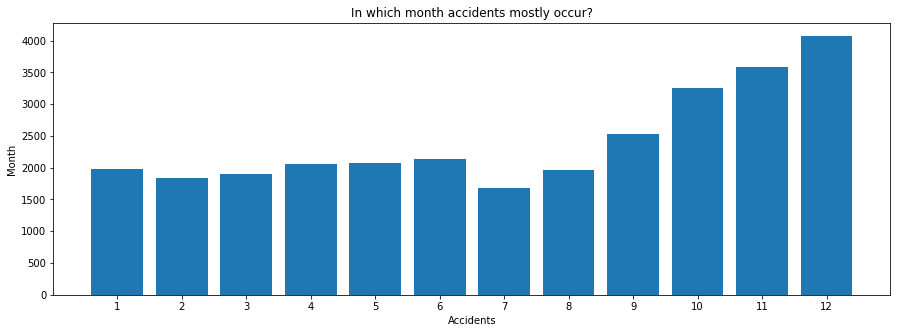

In [64]:
# In which months accidents mainly occurs
draw_plot('Month','In which month accidents mostly occur?','Accidents','Month')

From the above graph it could be observe;
1. Most of the accidents occur in the last 3 months. This might be due to Christmas and other such events.

### Task 3: Visualize US Accidents

In [ ]:
# installing libraries to visualize accidents
!pip install geopandas
!pip install shapely

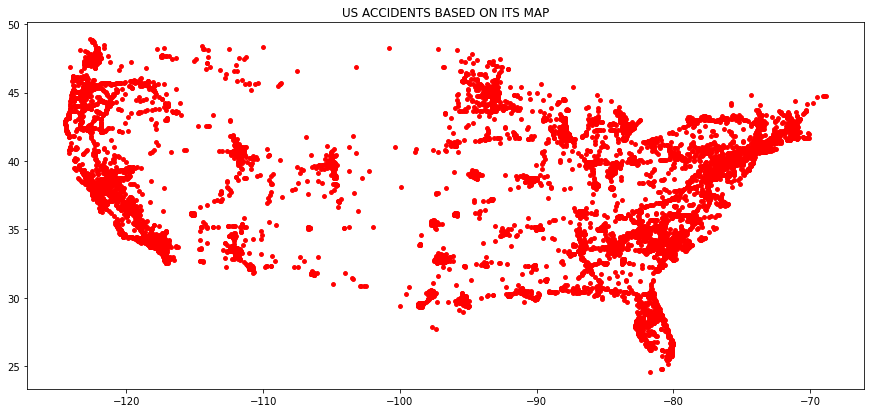

In [31]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(subset_data['Start_Lng'], subset_data['Start_Lat'])]
gdf = GeoDataFrame(subset_data, geometry=geometry)
fig, ax = plt.subplots(figsize=(15,15))
gdf.plot(ax=ax, marker='o', color='red', markersize=15)
plt.title('US ACCIDENTS BASED ON ITS MAP')
plt.show()

From the above figure it is clear that most of the accidents in the US occurs in the coastal areas like Califoria and Florida

### Task 4: In which weather conditions accidents occurs the most

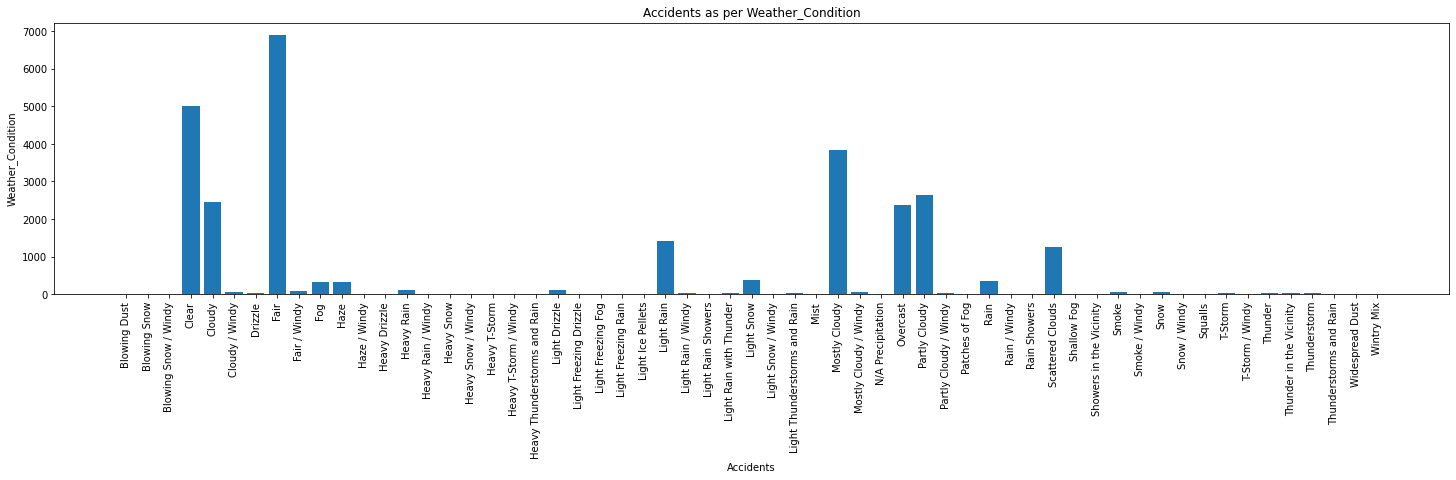

In [65]:
# data['Weather_Condition'].value_counts()
draw_plot('Weather_Condition','Accidents as per Weather_Condition','Accidents','Weather_Condition',25,5,'vertical')

From the above graph, it is evident that most of the accidents occur in clear weather, followed by cloudy weather and then rainy weather

### Task 5: Factors affecting accidents severity

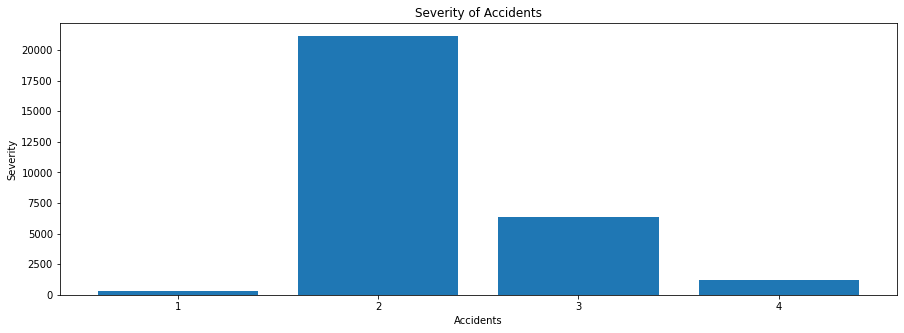

In [66]:
# Accidents as per their severity
draw_plot('Severity','Severity of Accidents','Accidents','Severity')

In [45]:
data.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,State,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Hour,Month,Count
0,A-1,2,2019-05-21 08:29:55,34.808868,-82.269157,SC,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,8,5,1
1,A-2,2,2019-10-07 17:43:09,35.090080,-80.745560,NC,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,17,10,1
2,A-3,2,2020-12-13 21:53:00,37.145730,-121.985052,CA,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,21,12,1
3,A-4,2,2018-04-17 16:51:23,39.110390,-119.773781,NV,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,16,4,1
4,A-5,3,2016-08-31 17:40:49,26.102942,-80.265091,FL,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,17,8,1


In [48]:
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29066 entries, 2067839 to 2675211
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 29066 non-null  object  
 1   Severity           29066 non-null  int64   
 2   Start_Time         29066 non-null  object  
 3   Start_Lat          29066 non-null  float64 
 4   Start_Lng          29066 non-null  float64 
 5   State              29066 non-null  object  
 6   Weather_Condition  28318 non-null  object  
 7   Amenity            29066 non-null  bool    
 8   Bump               29066 non-null  bool    
 9   Crossing           29066 non-null  bool    
 10  Give_Way           29066 non-null  bool    
 11  Junction           29066 non-null  bool    
 12  No_Exit            29066 non-null  bool    
 13  Railway            29066 non-null  bool    
 14  Roundabout         29066 non-null  bool    
 15  Station            29066 non-null  bool    
 

# Inferences and Conclusion